# Problem: Predictive loan model for an applicant

## Objective:

Predict the risk of a loan being default based on the past loan data, for a given loan applicant

Dataset:
 https://drive.google.com/drive/folders/1XCKR-Gdw9yziWWW6TVvx5wvArFkP96PP 

 Dataset will be provided in parts

Prep work required:

Data for 3 quarters will be provided to the students, with a select subset of features. This will be used for prep work and initial baselining.

 Identification of the performance parameters to be improved, for the given problem statement

 Baseline performance figures for 5 different ML classifiers, after minimal data pre-processing, Baseline figures must include (i) accuracy (ii) classification report (iii) confusion matrix (iv) ROC-AUC and AUPRC scores. One of the classifiers must be ANN.

 Observations from exploratory analysis of the dataset

 Outline of feature engineering techniques that may be used to improve the classifier
performance

# Performance

Session 1:

The complete dataset (with data for 2 more years and all features) will be provided.
 Shortlist 3 best performing classifiers, from the prep work
 Apply relevant feature engineering techniques on the dataset provided
 Compare the performance of the 3 classifiers with the baseline performance figured obtained
during prep-work
 Note down the features that figure high in feature ranking

Session 2:
 Apply ensemble techniques to observe their impact on the performance of the classifiers 

Session 3:
 Group presentation

# DataSet Description:

In [1]:
import os
import pandas as pd
def read_csv_data(dir_name):
    '''
    Arg: Directory Name
    Return: List of CSV files from a directory'''
    list_of_files=os.listdir(dir_name)
    return [file for file in list_of_files if file.endswith(".csv")]

def read_list_csv_to_pandas(list_of_csv_files):
    '''
    Arg: List of csv files name
    Return: Pandas dataframe with all file
    Assumption: ALl the files have same format'''
    pandas_list=[]
    for file in list_of_csv_files:
        pandas_list.append(pd.read_csv(os.path.join(utils['raw_data_path'],file),skiprows=1,parse_dates=['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d','hardship_start_date','hardship_end_date','payment_plan_start_date','debt_settlement_flag_date','settlement_date','earliest_cr_line']))
    merged_file=pd.concat(pandas_list)
    return merged_file

#After analysis we found that some are date column

In [2]:
DATA_PATH='/Users/mghosh2/Downloads/loan_data/'

utils={
    'raw_data_path':DATA_PATH
}

In [3]:
list_of_files=read_csv_data(utils['raw_data_path'])
list_of_files

['LoanStats_securev1_2017Q1.csv',
 'LoanStats_securev1_2017Q2.csv',
 'LoanStats_securev1_2017Q3.csv']

In [4]:
!head -n 5 /Users/mghosh2/Downloads/loan_data/LoanStats_securev1_2017Q1.csv
## It looks like first row is not useful

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","fico_range_low","fico_range_high","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","last_fico_range_high","last_fico_range_low","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_join

In [5]:
data_raw = read_list_csv_to_pandas(list_of_files)
data_raw.head()

/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,118,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,129,130,131,139,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN


In [6]:
", ".join(list(data_raw.columns))

'id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util,

In [7]:
data_raw.dtypes

id                               object
member_id                       float64
loan_amnt                       float64
funded_amnt                     float64
funded_amnt_inv                 float64
                              ...      
settlement_status                object
settlement_date          datetime64[ns]
settlement_amount               float64
settlement_percentage           float64
settlement_term                 float64
Length: 151, dtype: object

In [8]:
len(list(data_raw.columns))

151

In [ ]:
data_raw['loan_status'].value_counts()

Current               285047
Fully Paid             27576
Late (31-120 days)      5044
Charged Off             3036
In Grace Period         2661
Late (16-30 days)       1564
Default                    3
Name: loan_status, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

In [ ]:
def colume_details(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Non_Missing'] = df.shape[0] - summary['Missing']
    summary['Percent_Missing'] = summary['Missing']/df.shape[0]
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [ ]:
data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion=colume_details(data_raw)
column_explantion[column_explantion['dtypes']=='object']

Dataset Shape: (324937, 151)


,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,324937,0.000000,324937,104046719,104048967,104028593,18.31
5,term,object,6,324931,0.000018,2,36 months,36 months,36 months,0.84
6,int_rate,object,6,324931,0.000018,65,15.99%,25.49%,11.39%,5.43
8,grade,object,6,324931,0.000018,7,C,E,B,2.21
9,sub_grade,object,6,324931,0.000018,35,C5,E4,B3,4.51
10,emp_title,object,22481,302456,0.069186,95032,Project Leader,Pilot,cable technician,13.44
11,emp_length,object,22155,302782,0.068182,11,10+ years,10+ years,4 years,3.01
12,home_ownership,object,6,324931,0.000018,5,MORTGAGE,MORTGAGE,RENT,1.40
14,verification_status,object,6,324931,0.000018,3,Source Verified,Source Verified,Not Verified,1.57
16,loan_status,object,6,324931,0.000018,7,Current,Current,Current,0.72


In [ ]:
column_explantion[column_explantion['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
1,member_id,float64,324937,0,1.000000,0,NaN,NaN,NaN,0.00
2,loan_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
3,funded_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
4,funded_amnt_inv,float64,6,324931,0.000018,1551,14000,5000,4600,6.73
7,installment,float64,6,324931,0.000018,30173,492.13,200.1,151.45,12.10
13,annual_inc,float64,6,324931,0.000018,22133,82000,215000,44470,8.19
15,issue_d,datetime64[ns],6,324931,0.000018,9,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,3.16
19,desc,float64,324937,0,1.000000,0,NaN,NaN,NaN,0.00
24,dti,float64,298,324639,0.000917,6972,31.07,6.06,13.43,11.76
25,delinq_2yrs,float64,6,324931,0.000018,26,0,0,0,1.08


In [ ]:
date_columns=[x  for x in list(data_raw.columns) if x.endswith('d') or x.endswith('date')]
date_columns
## Not all are date columns so just an approximation

['id',
 'member_id',
 'issue_d',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'num_accts_ever_120_pd',
 'num_tl_30dpd',
 'sec_app_collections_12_mths_ex_med',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_dpd',
 'disbursement_method',
 'debt_settlement_flag_date',
 'settlement_date']

In [ ]:
column_explantion[column_explantion['dtypes']=='datetime64[ns]']
##Columns with high null values (more than ratio 0.999) are rejected
# We have to work with  'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d' this date columns

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
15,issue_d,datetime64[ns],6,324931,0.000018,9,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,3.16
26,earliest_cr_line,datetime64[ns],6,324931,0.000018,666,1996-05-01 00:00:00,2004-01-01 00:00:00,2003-12-01 00:00:00,8.40
47,last_pymnt_d,datetime64[ns],437,324500,0.001345,12,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,0.99
49,next_pymnt_d,datetime64[ns],30618,294319,0.094227,3,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,0.00
50,last_credit_pull_d,datetime64[ns],10,324927,0.000031,13,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,0.79
134,hardship_start_date,datetime64[ns],324186,751,0.997689,5,NaT,NaT,NaT,1.27
135,hardship_end_date,datetime64[ns],324186,751,0.997689,7,NaT,NaT,NaT,1.88
136,payment_plan_start_date,datetime64[ns],324186,751,0.997689,6,NaT,NaT,NaT,1.71
145,debt_settlement_flag_date,datetime64[ns],324794,143,0.999560,6,NaT,NaT,NaT,2.19
147,settlement_date,datetime64[ns],324794,143,0.999560,7,NaT,NaT,NaT,2.33


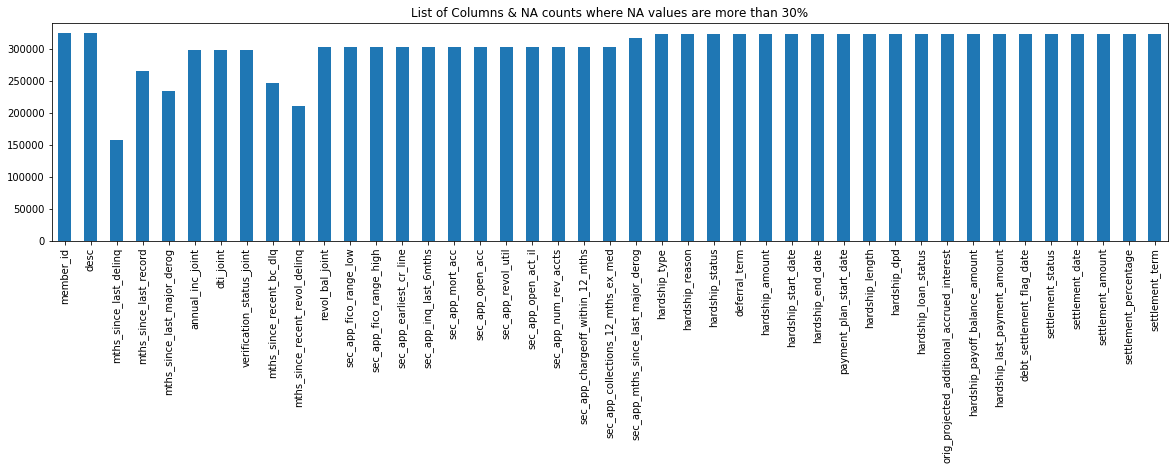

In [ ]:
NA_col = data_raw.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(data_raw))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

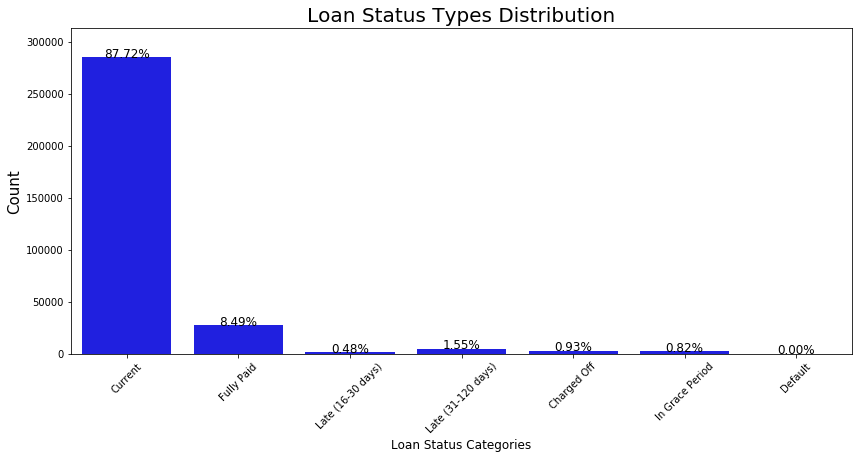

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total = len(data_raw)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data_raw, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

# From the figure and as explained by mam "Current is Non Risky and Rest are Risky"

In [ ]:
# We have to clean some columns like interest rate etc
import re
def int_rate_pick(text):
    text=str(text).strip()
    try:
        if len(text) >0:
            int_rate=re.compile(r'\d+(\.\d{1,2})?')
            int_rate=int_rate.search(text)[0]
            return float(int_rate)
        else:
            return 0
    except:
        return 0
    
##Looking at the data it looks 2018-01 last quarter. So we consider epoc 2018-02 when we have the data and doing analysis
from datetime import datetime

def date_diff(col_value_provided,today=datetime(2018,2,1,0,0,0)):
    diff = today-col_value_provided
    return diff.days
int_rate_pick('nan' )
# date_diff(datetime(2018,1,1,0,0,0))

0

In [ ]:
#columns with maximum Blank. 5 are printed
blank_columns=list(column_explantion[column_explantion['Percent_Missing'] > 0.99]['Name'].values)
blank_columns

['member_id',
 'desc',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [ ]:
#Loan Amount and Interest Rate distribution

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(data_raw[:100000].fillna(0)["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_rate", data=data_raw.fillna(0)[:100000], 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=8)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
# importtant date column for feature creation. 'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d'
# Drop columns to reduce the data size
data_raw=data_raw.drop(blank_columns,axis=1)

data_raw['int_rate_float']=data_raw['int_rate'].apply(int_rate_pick)
data_raw['revol_util_float']=data_raw['revol_util'].apply(int_rate_pick)
data_raw['days_since_issue']=data_raw['issue_d'].apply(date_diff)
data_raw['days_since_last_payment']=data_raw['last_pymnt_d'].apply(date_diff)
data_raw['days_since_next_payment']=data_raw['next_pymnt_d'].apply(date_diff)
data_raw['days_since_last_credit_pull']=data_raw['last_credit_pull_d'].apply(date_diff)
data_raw['years_since_credit_line']=data_raw['earliest_cr_line'].apply(date_diff).apply(lambda x: x/365)

data_raw.drop(['last_pymnt_d','next_pymnt_d','last_credit_pull_d','int_rate','revol_util','earliest_cr_line'],axis=1)
data_raw.head()

In [ ]:
y = data_raw['loan_status'].copy()
y = y.isin(['Fully Paid','Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')
y.value_counts()

In [ ]:
## 'emp_title' and 'url' are high cardinality. We will ignore url column

data_raw['emp_length'][:100000].value_counts(normalize=True) * 100

In [ ]:
data_raw['emp_title'][:100000].value_counts(normalize=True) * 100

#Not any useful column

In [ ]:
# data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion2=colume_details(data_raw)
column_explantion2[column_explantion2['dtypes']=='object']

In [ ]:
column_explantion2[column_explantion2['dtypes']!='object']

In [ ]:
categorical_features=list(column_explantion2[column_explantion2['dtypes']=='object']['Name'].values)
categorical_features=[x for x in categorical_features if x not in ['id','url','emp_title','loan_status']]
categorical_features

In [ ]:
numerical_features=list(column_explantion2[column_explantion2['dtypes']=='float64']['Name'].values)
numerical_features[:5]

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 

#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 
    

In [ ]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

numeric_features = numerical_features
numeric_transformer = Pipeline(steps=[
#     ( 'num_selector', FeatureSelector(numerical_features) ),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = categorical_features
categorical_transformer = Pipeline(steps=[
#     ( 'cat_selector', FeatureSelector(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1'))])
#                         ('classifier', LogisticRegression(penalty='l2',solver='lbfgs'))])

X=data_raw.drop(['loan_status'],axis=1)
y = data_raw['loan_status'].copy()
y = y.isin(['Fully Paid','Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
import pickle
with open("logisic_model_pipeline_l1.mod","wb") as f:
    pickle.dump(clf,f)

In [ ]:
# data_preprocessing=Pipeline(steps=[('preprocessor', preprocessor)])
# clf2=LogisticRegression(penalty='l1')
# clf2.fit(data_preprocessing.fit(X).transform(X),y)

In [ ]:
list(clf._final_estimator)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[numerical_features].fillna(0).values, i) for i in range(X[numerical_features].fillna(0).shape[1])]
vif["features"] = numerical_features

In [ ]:
vif.sort_values(by='VIF Factor',ascending=False).head(20)

In [ ]:
X[numerical_features].fillna(0).corr()

In [ ]:
#Actually Loan amount and funded amount are same column and they are related with 'funded_amnt_inv' as thats why so high VIF
## Such is hugh VIF. We shall pick numerical features with VIF less than 3
vif[vif['VIF Factor']<3.1].sort_values(by='VIF Factor',ascending=False)

In [ ]:
#Random Forest to figure out top categorical predictors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

class LabelEncoderByCol(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        #List of column names in the DataFrame that should be encoded
        self.col = col
        #Dictionary storing a LabelEncoder for each column
        self.le_dic = {}
        for el in self.col:
            self.le_dic[el] = LabelEncoder()

    def fit(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            self.le_dic[el].fit(a)
        return self

    def transform(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            #Store an ndarray of the current column
            b = x[el].get_values()
            #Replace the elements in the ndarray that are not 'NaN'
            #using the transformer
            b[b!='NaN'] = self.le_dic[el].transform(a)
            #Overwrite the column in the DataFrame
            x[el]=b
        #return the transformed DataFrame
        return x
    
labelencoder = LabelEncoderByCol(categorical_features)
cat_features=labelencoder.fit(X[categorical_features].fillna('missing')).transform(X[categorical_features].fillna('missing'))
rf_clf= RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(cat_features,y)

In [ ]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = categorical_features,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

In [ ]:
##Collating the above lets create a list of categorical important and numerical important variables

cat_imp_feature=list(feature_importances[feature_importances['importance']>0.0].index)
num_imp_feature=list(vif[vif['VIF Factor']<3.1]['features'])
len(cat_imp_feature+num_imp_feature)

# So we have selected total 30 variables to work with
# The same pipeline we will apply and get the classifiers

In [ ]:
np.random.seed(0)

numeric_features = num_imp_feature
numeric_transformer = Pipeline(steps=[
#     ( 'num_selector', FeatureSelector(numerical_features) ),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = cat_imp_feature
categorical_transformer = Pipeline(steps=[
#     ( 'cat_selector', FeatureSelector(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(penalty='l1'))])
                        ('classifier', LogisticRegression(penalty='l2',solver='lbfgs'))])

X=data_raw[cat_imp_feature+num_imp_feature]
y = data_raw['loan_status'].copy()
y = y.isin(['Fully Paid','Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
          'ADB': AdaBoostClassifier(n_estimators=100, random_state=0),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1,solver='lbfgs'),
          'SVM': SVC(gamma='auto'),
          'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-5,
                                hidden_layer_sizes=(20,12,2), random_state=1)}

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

unbalset = {}
clf_new = {}
for i in models.keys():
    clf_new[i] = Pipeline(steps=[('preprocessor', preprocessor),
                              ('to_dense', DenseTransformer()),
                      ('classifier', models[i])])
    scores = cross_val_score(clf_new[i], X_train[cat_imp_feature+num_imp_feature],
                                    y_train, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def createROC(clf_new, X, y, Xte, yte):
    false_p, true_p, threshold_l = [], [], [] ##false postives and true positives

    for i in clf_new.keys():  ##dict of models
        clf_new[i].fit(X, y)

        fp, tp, threshold = roc_curve(yte, clf_new[i].predict_proba(Xte)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        threshold_l.append(threshold)
    return true_p, false_p, threshold_l ##returning the true postive and false positive

tp_unbalset, fp_unbalset ,threshold_unbalset= createROC(clf_new, X_train[cat_imp_feature+num_imp_feature], t_train, X_test[cat_imp_feature+num_imp_feature] , y_test)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [ ]:
fp, tp, threshold = tp_unbalset[0], fp_unbalset[0] ,threshold_unbalset[0] #getting false and true positive from test set

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')